# 1. Create model

In [ ]:
import runet as vae_util

In [ ]:
import numpy as np
from keras import backend as K
from keras import layers
from keras.models import Model
from keras.optimizers import Adam
import h5py

In [3]:
input_shape = (128, 128, 3)
vae_model = vae_util.create_vae(input_shape)
vae_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image (InputLayer)              (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   448         image[0][0]                      
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 64, 64, 16)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

# 2. Load data

In [ ]:
# Please download the data at https://drive.google.com/drive/folders/1nHpXhKjOw_nBk8GvoYfzBj5tcBNaZ6Hh?usp=sharing
data_dir = '/your/data/dir/'
hf_r = h5py.File(data_dir + 'train_200000.hdf5', 'r')
train_x = np.array(hf_r.get('k'))
train_y = np.array(hf_r.get('S'))
hf_r.close()

In [ ]:
hf_w = h5py.File(data_dir + 'test_200000.hdf5', 'r')
test_x = np.array(hf_w.get('k'))
test_y = np.array(hf_w.get('S'))
hf_w.close()

In [ ]:
print('train_x shape is ', train_x.shape)
print('train_y shape is ', train_y.shape)
print('test_x shape is ', test_x.shape)
print('test_y shape is ', test_y.shape)

In [ ]:
train_x = train_x.transpose(2, 0, 1, 3)
train_y = train_y.transpose(2, 0, 1, 3)
test_x = test_x.transpose(2, 0, 1, 3)
test_y = test_y.transpose(2, 0, 1, 3)
print('train_x shape is ', train_x.shape)
print('train_y shape is ', train_y.shape)
print('test_x shape is ', test_x.shape)
print('test_y shape is ', test_y.shape)

# 3. Load trained weights

In [ ]:
model_dir = '/your/model/dir/saved_models/trained_model_ep50.h5'

print(model_dir)
vae_model.load_weights(model_dir)

# 4. Predict and visulization

In [ ]:
sat_pred_eval = vae_model.predict(test_x[:10,...])
print(sat_pred_eval.shape)

In [ ]:
sat_pred_train = vae_model.predict(train_x[:10,...])
print(sat_pred_train.shape)

<Figure size 432x288 with 0 Axes>

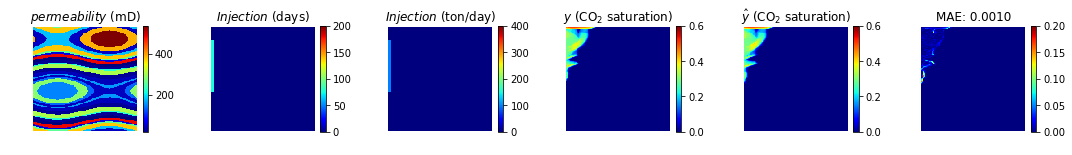

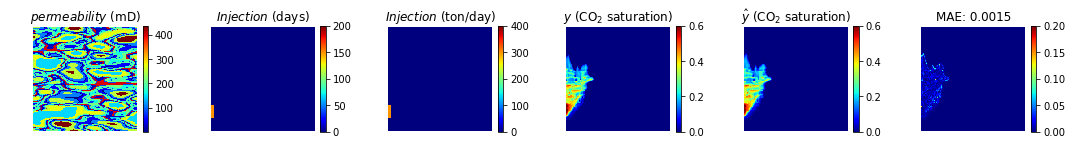

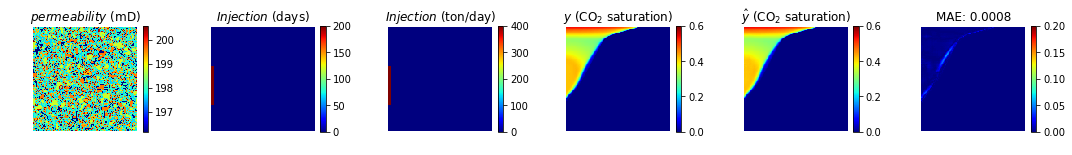

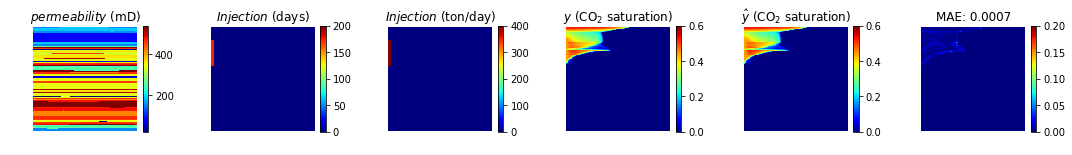

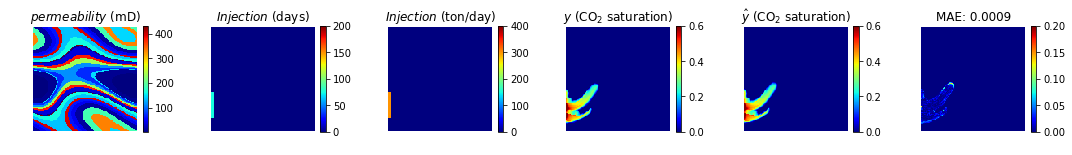

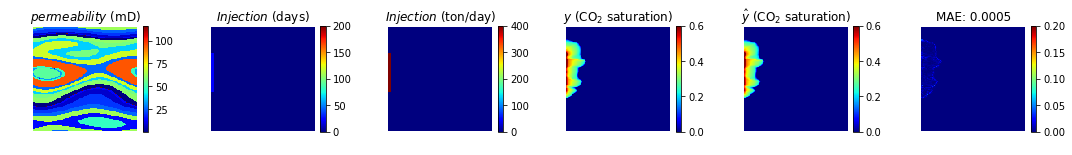

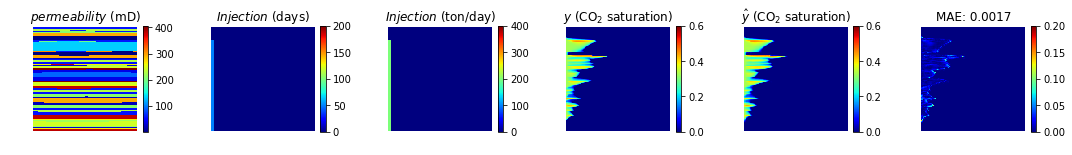

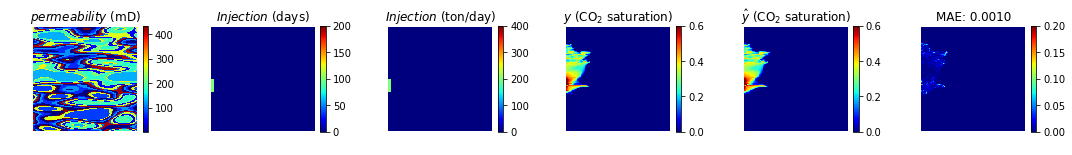

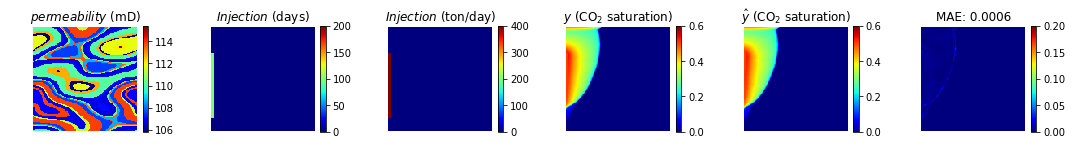

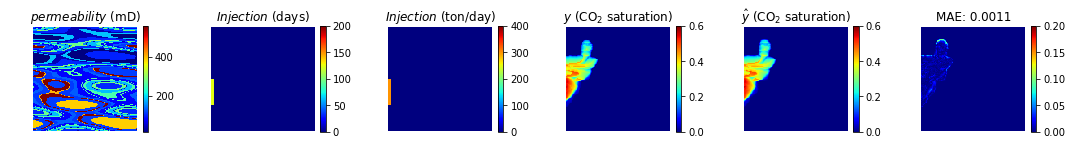

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap('jet')
for k in range(0,10):
    plt.figure(k,figsize=(15,3))
    
    plt.subplot(1,6,1)
    plt.title('$permeability$ (mD)')
    plt.imshow(train_x[k, :, :, 0] * 1000)
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,2)
    plt.title('$Injection$ (days)')
    plot_day = train_x[k, :, :, 1]*200
    plot_day[:,1:4] = plot_day[:,0].reshape(128,1)
    plt.imshow(plot_day)
    plt.clim([0, 200])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,3)
    plt.title('$Injection$ (ton/day)')
    plot_rate = train_x[k, :, :, 2]*400
    plot_rate[:,1:4] = plot_rate[:,0].reshape(128,1)
    plt.imshow(plot_rate)
    plt.clim([0, 400])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,4)
    plt.title('$y$ (CO$_2$ saturation)')
    plt.imshow(train_y[k, :, :, 0].reshape(128, 128))
    plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,5)
    plt.imshow(sat_pred_train[k, :, :, 0].reshape(128, 128))
    plt.title('$\hat{y}$ (CO$_2$ saturation)')
    plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,6)
    abs_err = np.abs((sat_pred_train[k, :, :, 0] - train_y[k, :, :, 0]))
    plt.imshow(abs_err) 
    mean_err = np.mean(abs_err)
    plt.title('MAE: %.4f' % mean_err)
    plt.colorbar(fraction=0.046)
    plt.clim([0, 0.2])
    plt.tight_layout()
    plt.axis('off')
    plt.show()

    

<Figure size 432x288 with 0 Axes>

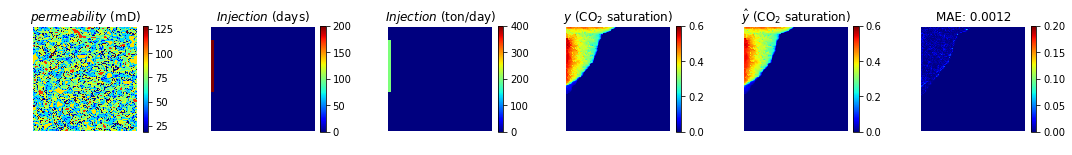

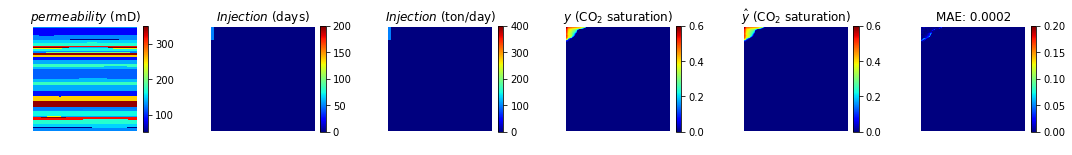

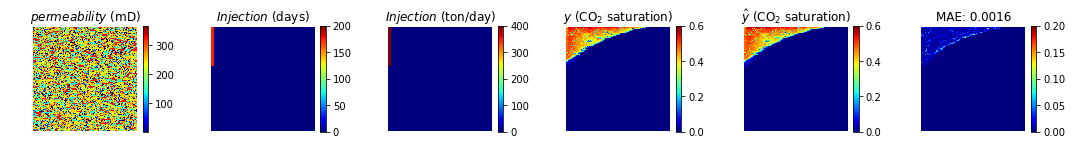

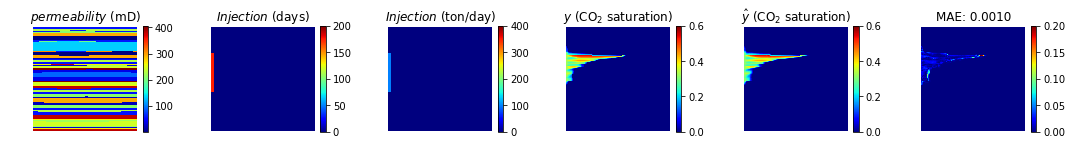

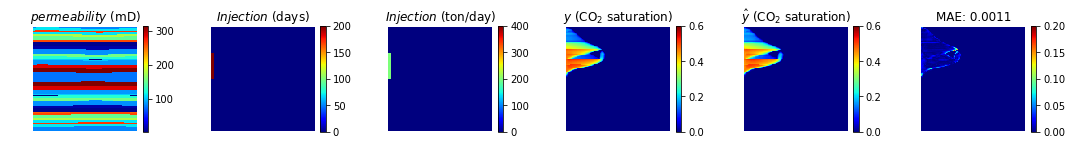

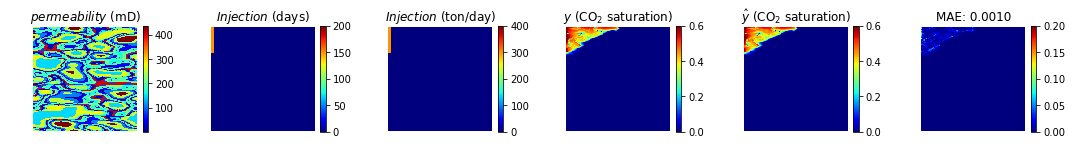

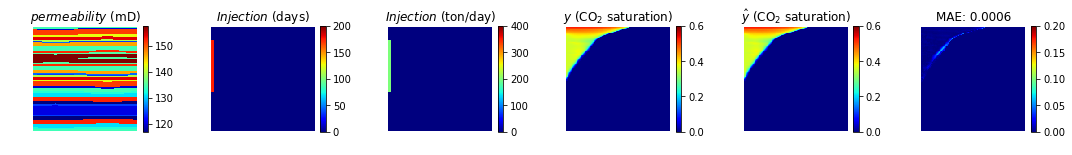

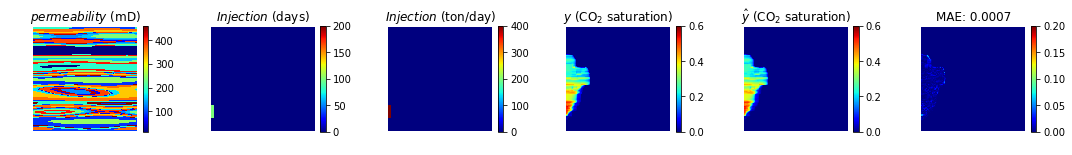

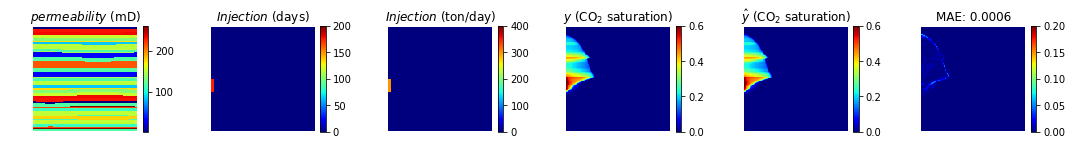

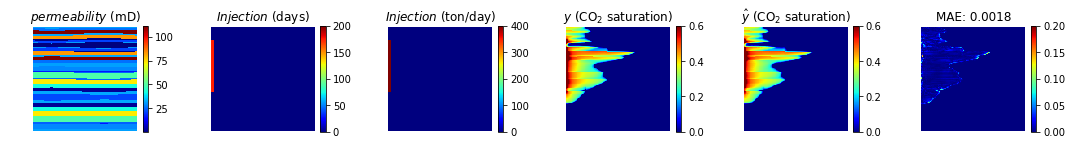

IndexError: index 10 is out of bounds for axis 0 with size 10

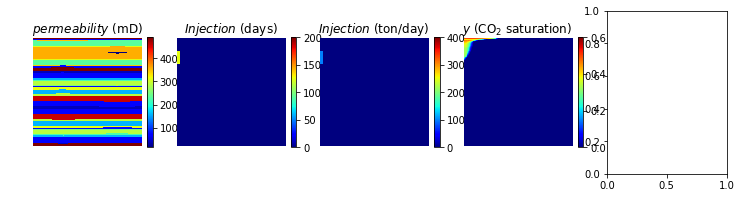

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap('jet')

for k in range(0,50):
    plt.figure(k,figsize=(15,3))
    
    plt.subplot(1,6,1)
    plt.title('$permeability$ (mD)')
    plt.imshow(test_x[k, :, :, 0] * 1000)
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,2)
    plt.title('$Injection$ (days)')
    plot_day = test_x[k, :, :, 1]*200
    plot_day[:,1:4] = plot_day[:,0].reshape(128,1)
    plt.imshow(plot_day)
    plt.clim([0, 200])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,3)
    plt.title('$Injection$ (ton/day)')
    plot_rate = test_x[k, :, :, 2]*400
    plot_rate[:,1:4] = plot_rate[:,0].reshape(128,1)
    plt.imshow(plot_rate)
    plt.clim([0, 400])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,4)
    inj = test_x[k, 1, 1, 0]*50
    plt.title('$y$ (CO$_2$ saturation)')
    plt.imshow(test_y[k, :, :, 0].reshape(128, 128))
    plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,5)
    plt.imshow(sat_pred_eval[k, :, :, 0].reshape(128, 128))
    plt.title('$\hat{y}$ (CO$_2$ saturation)')
    plt.clim([0, 0.6])
    plt.colorbar(fraction=0.046)
    plt.axis('off')
    
    plt.subplot(1,6,6)
    abs_err = np.abs((sat_pred_eval[k, :, :, 0] - test_y[k, :, :, 0]))
    plt.imshow(abs_err) 
    mean_err = np.mean(abs_err)
    plt.title('MAE: %.4f' % mean_err)
    plt.colorbar(fraction=0.046)
    plt.clim([0, 0.2])
    plt.tight_layout()
    plt.axis('off')
    
    plt.show()